### **📌 Time Series & Finance – Topics & Subtopics**  

#### **1️⃣ Time Series Forecasting**  
✅ **Basics of Time Series Analysis**  
- Stationarity & Differencing  
- Autocorrelation & Partial Autocorrelation (ACF, PACF)  

✅ **Statistical Time Series Models**  
- ARIMA (AutoRegressive Integrated Moving Average)  
- SARIMA (Seasonal ARIMA)  
- Exponential Smoothing (SES, Holt, Holt-Winters)  
- GARCH (Generalized Autoregressive Conditional Heteroskedasticity)  

✅ **Machine Learning for Time Series**  
- Feature Engineering for Time Series  
- Random Forest & Gradient Boosting for Time Series  
- LSTMs & Transformer-based Time Series Models  

---



#### **2️⃣ Finance Applications**  
✅ **Risk Modeling**  
- Value at Risk (VaR)  
- Conditional VaR (CVaR)  
- Monte Carlo Simulations for Risk Estimation  

✅ **Fraud Detection in Finance**  
- Anomaly Detection Techniques (Isolation Forest, One-Class SVM)  
- Unsupervised Learning for Fraud Detection (Autoencoders)  
- Graph-Based Fraud Detection (Neo4j for fraud networks)  

---



# 📊 **Time Series Forecasting – Detailed Exploration with Code Snippets**  

## 🔹 **1. Understanding Time Series Data**  
A **time series** is a sequence of data points recorded at successive time intervals. Examples include stock prices, weather patterns, and sales data.  

### **Key Concepts in Time Series Analysis**  
- **Trend**: Long-term increase or decrease in data  
- **Seasonality**: Repeated patterns at regular intervals  
- **Cyclic Patterns**: Fluctuations not of fixed length (business cycles)  
- **Stationarity**: A time series is stationary if its statistical properties (mean, variance) remain constant over time  

📌 **Let's import and visualize a sample dataset (Air Passenger Data)**  



In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


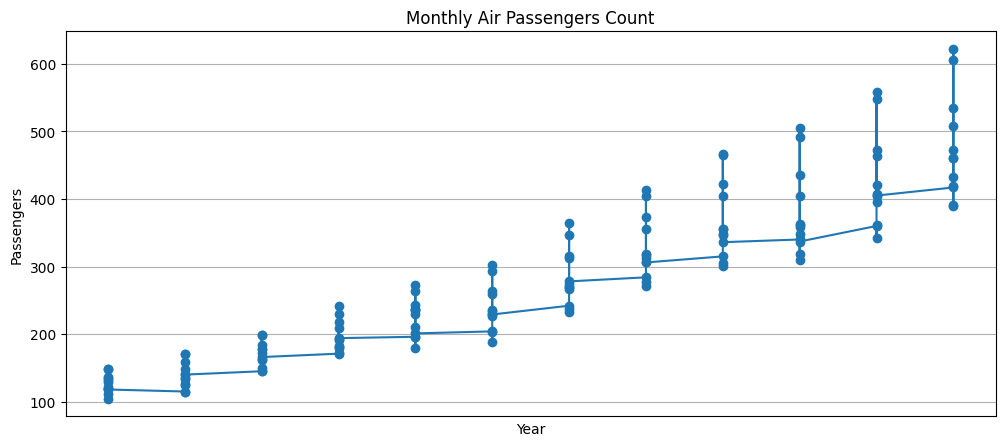

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
from statsmodels.datasets import get_rdataset
data = get_rdataset("AirPassengers", "datasets").data

# Convert to datetime
data['Month'] = pd.to_datetime(data['time'])
data.set_index('Month', inplace=True)

# Plot the data
plt.figure(figsize=(12,5))
plt.plot(data['value'], marker='o', linestyle='-')
plt.title("Monthly Air Passengers Count")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.grid()
plt.show()




---

## 🔹 **2. Time Series Forecasting Methods**  

### **📌 2.1 Moving Average & Exponential Smoothing**
Simple techniques to smooth fluctuations and reveal trends.

### **👉 Simple Moving Average (SMA)**  
The **Moving Average (MA)** smooths data by averaging values over a fixed window.  



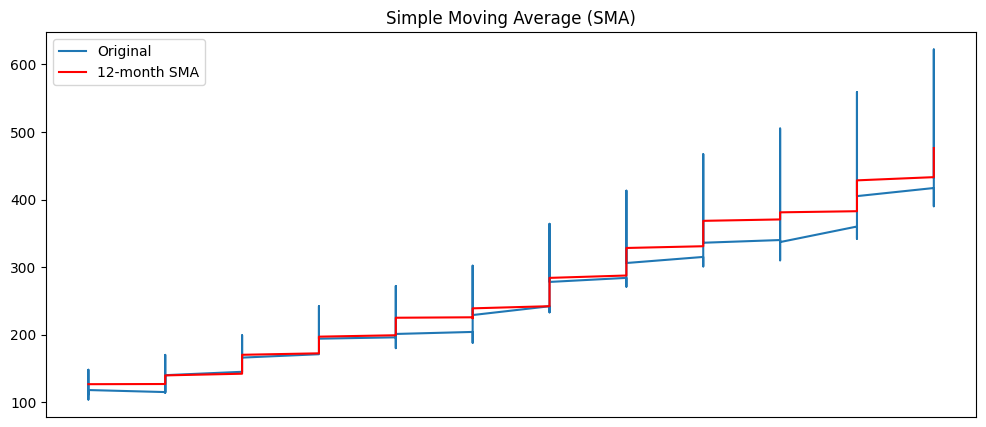

In [4]:

data['SMA_12'] = data['value'].rolling(window=12).mean()

# Plot moving average
plt.figure(figsize=(12,5))
plt.plot(data['value'], label="Original")
plt.plot(data['SMA_12'], label="12-month SMA", color='red')
plt.legend()
plt.title("Simple Moving Average (SMA)")
plt.show()




---

### **👉 Exponential Smoothing**  
Unlike SMA, **Exponential Smoothing (SES)** assigns exponentially decreasing weights to past values.



/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


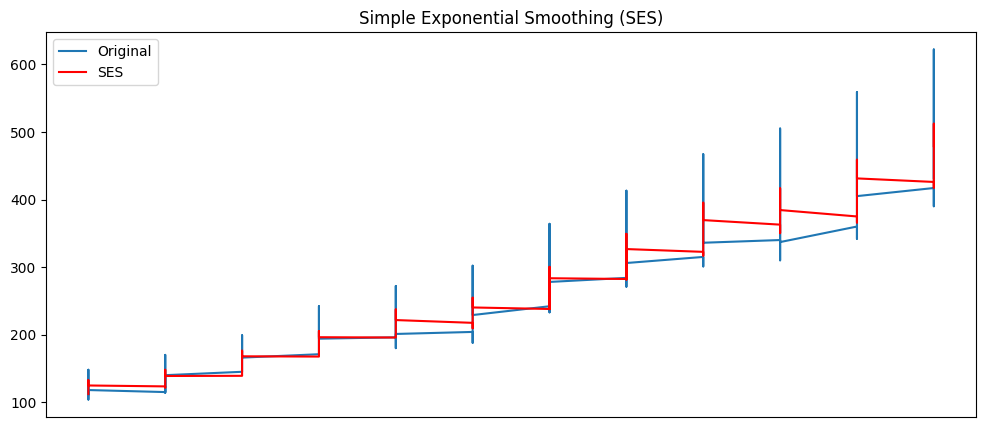

In [5]:

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Apply Exponential Smoothing
ses_model = SimpleExpSmoothing(data['value']).fit(smoothing_level=0.2)
data['SES'] = ses_model.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(data['value'], label="Original")
plt.plot(data['SES'], label="SES", color='red')
plt.legend()
plt.title("Simple Exponential Smoothing (SES)")
plt.show()




---

## 🔹 **3. ARIMA (AutoRegressive Integrated Moving Average)**  
**ARIMA** is one of the most popular time series forecasting models.  

### **📌 ARIMA Components**  
- **AR (AutoRegression)**: Relationship between a value and past values  
- **I (Integration)**: Differencing to make data stationary  
- **MA (Moving Average)**: Relationship between a value and past errors  

### **👉 Step 1: Check Stationarity**


In [6]:

from statsmodels.tsa.stattools import adfuller

# Perform ADF Test
result = adfuller(data['value'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: 0.815368879206053
p-value: 0.9918802434376411



If **p-value > 0.05**, the data is non-stationary, and differencing is needed.

### **👉 Step 2: Differencing to Achieve Stationarity**


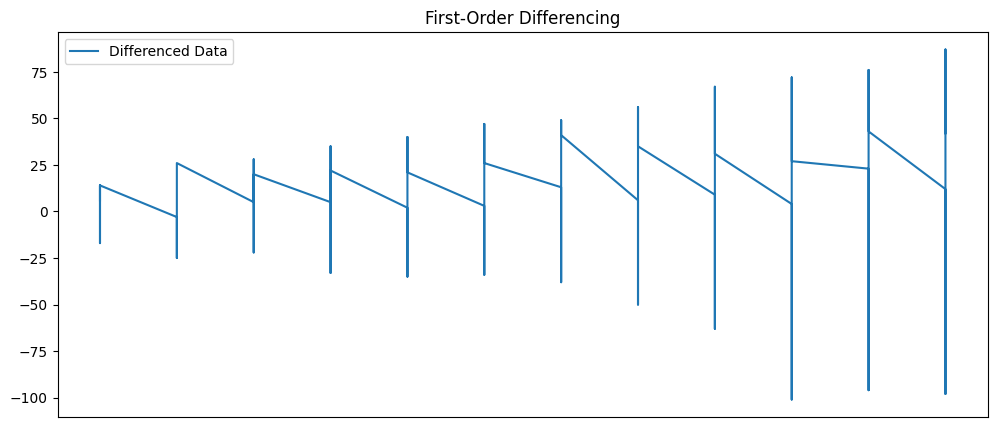

In [9]:

data['diff'] = data['value'].diff()
data = data.dropna(subset=['diff'])
plt.figure(figsize=(12,5))
plt.plot(data['diff'], label="Differenced Data")
plt.legend()
plt.title("First-Order Differencing")
plt.show()




### **👉 Step 3: Identify ARIMA Orders using ACF & PACF**


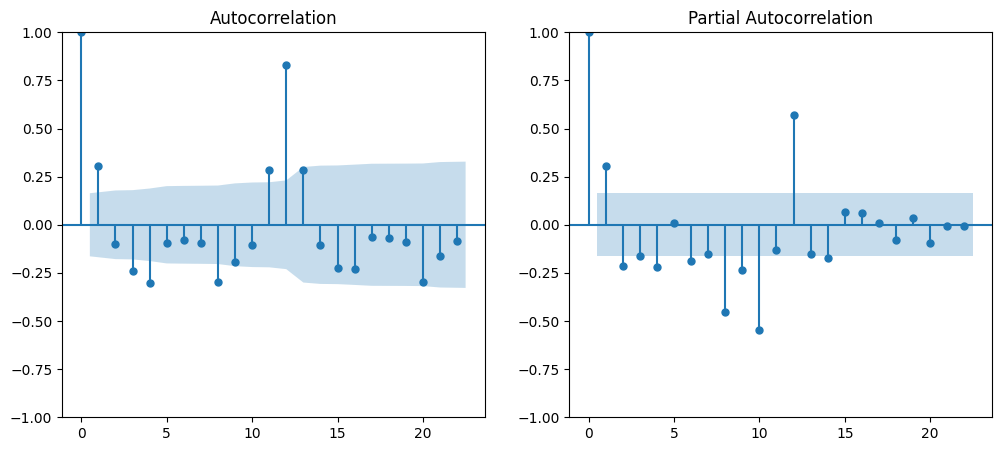

In [10]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(1,2, figsize=(12,5))
plot_acf(data['diff'].dropna(), ax=ax[0])
plot_pacf(data['diff'].dropna(), ax=ax[1])
plt.show()



- **AR Order (p)**: Look at PACF (cutoff after lag)  
- **MA Order (q)**: Look at ACF  

### **👉 Step 4: Fit ARIMA Model**


/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
 

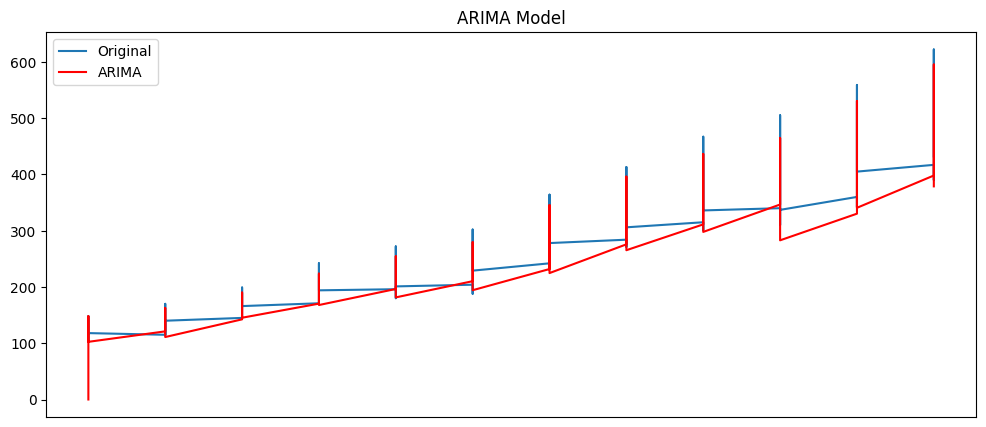

In [11]:

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA Model (p=2, d=1, q=2 as an example)
model = ARIMA(data['value'], order=(2,1,2))
model_fit = model.fit()

# Forecast
data['ARIMA_Fitted'] = model_fit.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(data['value'], label="Original")
plt.plot(data['ARIMA_Fitted'], label="ARIMA", color='red')
plt.legend()
plt.title("ARIMA Model")
plt.show()




---

## 🔹 **4. SARIMA (Seasonal ARIMA)**
If data has seasonality, we use **SARIMA**, which adds seasonal parameters:

- **(p, d, q) (P, D, Q, m)**  
- `m`: Seasonal Periodicity (e.g., 12 for monthly data)

### **👉 Fit SARIMA Model**


/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/var/folders/rn/kh_33hpd2s12y9sdfb85yhjc0000gp/T/ipykernel_29535/1886495631.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SARIMA_Fitted'] = sarima_fit.fittedvalues


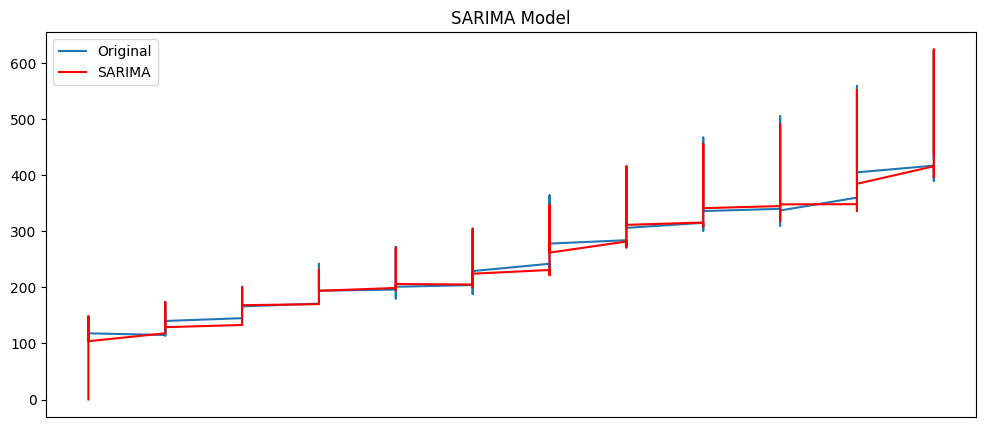

In [12]:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA Model
sarima_model = SARIMAX(data['value'], order=(2,1,2), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

data['SARIMA_Fitted'] = sarima_fit.fittedvalues

plt.figure(figsize=(12,5))
plt.plot(data['value'], label="Original")
plt.plot(data['SARIMA_Fitted'], label="SARIMA", color='red')
plt.legend()
plt.title("SARIMA Model")
plt.show()




---

## 🔹 **5. GARCH (Generalized Autoregressive Conditional Heteroskedasticity)**
GARCH is used for modeling **volatility** in time series (e.g., stock price fluctuations).  

### **👉 Fit GARCH Model**


Iteration:      1,   Func. Count:      6,   Neg. LLF: 852.5712092300623
Iteration:      2,   Func. Count:     11,   Neg. LLF: 852.1519538648781
Iteration:      3,   Func. Count:     17,   Neg. LLF: 851.3614147870235
Iteration:      4,   Func. Count:     22,   Neg. LLF: 850.8484633703254
Iteration:      5,   Func. Count:     27,   Neg. LLF: 848.6449763023521
Iteration:      6,   Func. Count:     32,   Neg. LLF: 3584.5701191849876
Iteration:      7,   Func. Count:     38,   Neg. LLF: 6798.804586067665
Iteration:      8,   Func. Count:     44,   Neg. LLF: 13999.252951470791
Iteration:      9,   Func. Count:     50,   Neg. LLF: 835.8424725169017
Iteration:     10,   Func. Count:     55,   Neg. LLF: 836.6819199059428
Iteration:     11,   Func. Count:     61,   Neg. LLF: 834.7775205640366
Iteration:     12,   Func. Count:     67,   Neg. LLF: 834.7370068640043
Iteration:     13,   Func. Count:     72,   Neg. LLF: 834.7369601443352
Iteration:     14,   Func. Count:     77,   Neg. LLF: 834.7368

/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.419e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


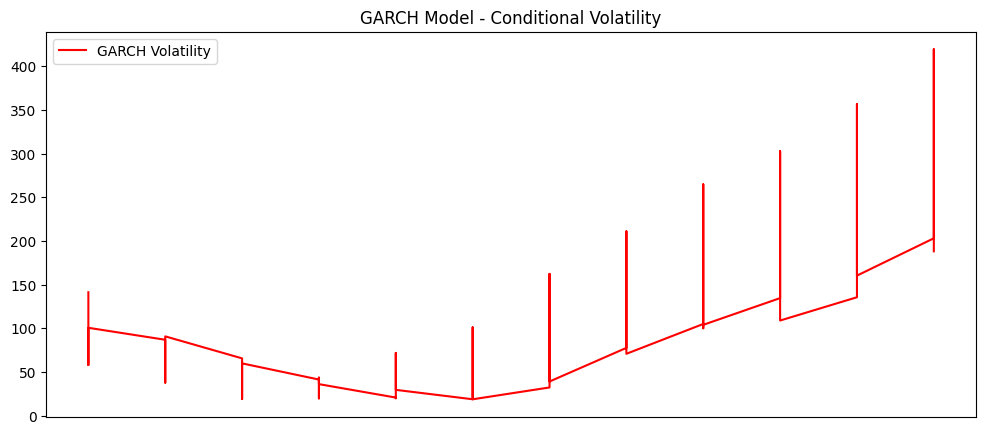

In [15]:

from arch import arch_model

# Fit GARCH Model
garch_model = arch_model(data['value'], vol='Garch', p=1, q=1)
garch_fit = garch_model.fit()

# Plot Volatility
plt.figure(figsize=(12,5))
plt.plot(garch_fit.conditional_volatility, label="GARCH Volatility", color='red')
plt.legend()
plt.title("GARCH Model - Conditional Volatility")
plt.show()




---

## **🎯 Summary of Time Series Methods**
| **Method**           | **Use Case** |
|----------------------|-------------|
| Moving Average      | Trend smoothing |
| Exponential Smoothing | Short-term forecasting |
| ARIMA               | Non-seasonal time series |
| SARIMA              | Seasonal time series |
| GARCH               | Financial volatility forecasting |

---



# 📊 **Advanced Time Series Forecasting & Finance Applications – In-Depth Exploration with Code**  

Now that we've covered the fundamentals of **time series forecasting**, let’s dive into:  
✅ **Model Evaluation for Time Series** (AIC, BIC, RMSE, MAPE)  
✅ **Advanced Forecasting Methods** (Prophet, VAR, LSTM)  
✅ **Time Series Applications in Finance** (Risk Modeling, Anomaly Detection)  

---

## 🔹 **1️⃣ Model Evaluation for Time Series**  

To assess the quality of time series models, we use:  
- **AIC (Akaike Information Criterion) & BIC (Bayesian Information Criterion)** – Model selection criteria  
- **RMSE (Root Mean Squared Error) & MAPE (Mean Absolute Percentage Error)** – Forecast accuracy  

### **📌 AIC & BIC – Model Selection Criteria**  
Lower **AIC/BIC** values indicate a better model fit.  



In [16]:

print(f"ARIMA Model AIC: {model_fit.aic}")
print(f"ARIMA Model BIC: {model_fit.bic}")


ARIMA Model AIC: 1344.9620204106063
ARIMA Model BIC: 1359.7411556986126




---

### **📌 RMSE & MAPE – Forecasting Errors**  
RMSE and MAPE evaluate how well the model predicts future values.  



In [17]:

from sklearn.metrics import mean_squared_error

# Compute RMSE
rmse = np.sqrt(mean_squared_error(data['value'][1:], data['ARIMA_Fitted'][1:]))
print(f"RMSE: {rmse}")

# Compute MAPE
mape = np.mean(np.abs((data['value'][1:] - data['ARIMA_Fitted'][1:]) / data['value'][1:])) * 100
print(f"MAPE: {mape}%")


RMSE: 26.210880623073876
MAPE: 7.1672037168535905%



---

## 🔹 **2️⃣ Advanced Forecasting Methods**  

Now, let's explore powerful time series forecasting models.  

### **📌 Facebook Prophet – Handles Seasonality & Missing Data**  

**Why Prophet?**  
✔ Automatically detects trends & seasonality  
✔ Handles missing values  
✔ Works well with real-world data  



/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
16:41:54 - cmdstanpy - INFO - Chain [1] start processing
16:41:55 - cmdstanpy - INFO - Chain [1] done processing
/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


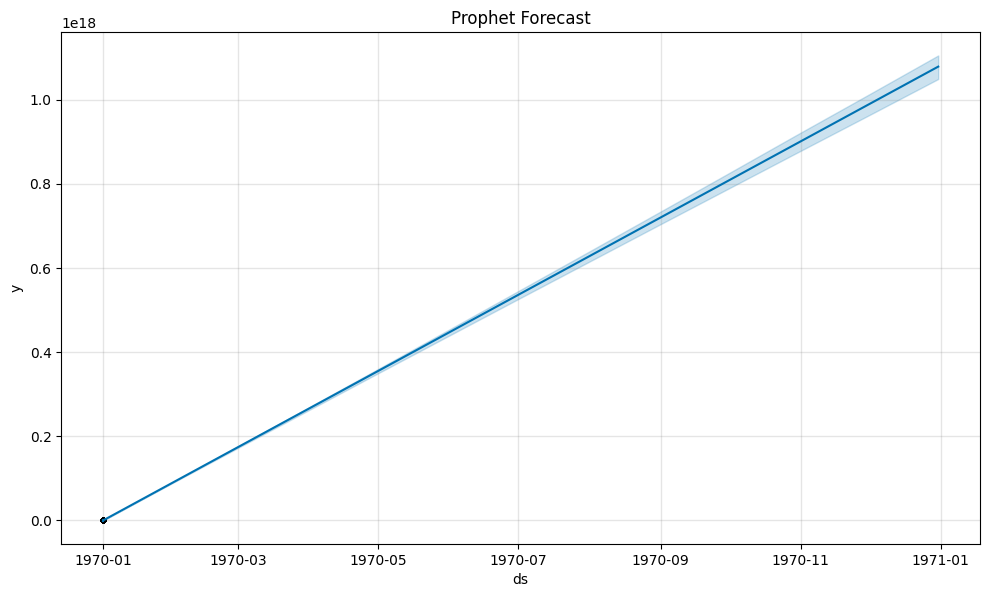

In [20]:

from prophet import Prophet

# Prepare dataset for Prophet
prophet_data = data.reset_index()[['Month', 'value']]
prophet_data.columns = ['ds', 'y']  # Rename for Prophet

# Fit the model
prophet = Prophet()
prophet.fit(prophet_data)

# Forecast for next 12 months
future = prophet.make_future_dataframe(periods=12, freq='M')
forecast = prophet.predict(future)

# Plot the forecast
prophet.plot(forecast)
plt.title("Prophet Forecast")
plt.show()




---

### **📌 VAR (Vector AutoRegression) – For Multivariate Time Series**  

VAR models relationships between multiple time series variables (e.g., stock prices & economic indicators).  


/Users/deepanshu/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


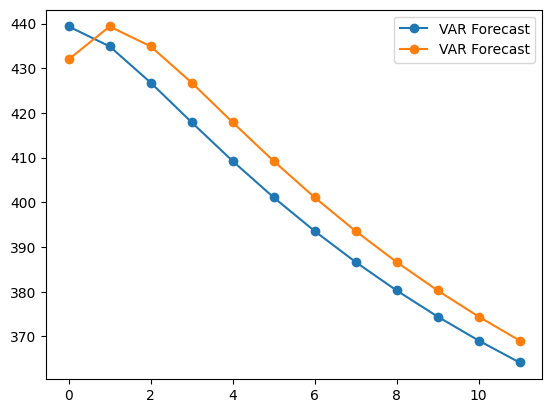

In [21]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Example with two time series variables
var_data = data[['value']].copy()
var_data['Lag1'] = var_data['value'].shift(1)

# Fit VAR model
var_model = VAR(var_data.dropna())
var_fit = var_model.fit()

# Forecast
forecast = var_fit.forecast(var_data.dropna().values[-1:], steps=12)

plt.plot(forecast, marker='o', label="VAR Forecast")
plt.legend()
plt.show()



---

### **📌 LSTM (Long Short-Term Memory) – Deep Learning for Time Series**  

LSTMs capture long-term dependencies in time series data.  


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Prepare data
X, y = [], []
for i in range(len(data)-10):
    X.append(data['value'].values[i:i+10])
    y.append(data['value'].values[i+10])

X, y = np.array(X), np.array(y)
X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for LSTM

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(10,1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, verbose=0)

# Make predictions
y_pred = model.predict(X)

plt.plot(y, label="Actual")
plt.plot(y_pred, label="LSTM Prediction", linestyle='dashed')
plt.legend()
plt.show()


ModuleNotFoundError: No module named 'tensorflow'


---

## 🔹 **3️⃣ Time Series Applications in Finance**  

Now, let’s apply time series forecasting to **Risk Modeling & Anomaly Detection** in finance.  

### **📌 Value at Risk (VaR) – Risk Modeling**  
**VaR** measures the potential loss of an investment over a given time period.  



In [ ]:

import scipy.stats as stats

confidence_level = 0.95
returns = data['value'].pct_change().dropna()

# Calculate historical VaR
VaR_95 = np.percentile(returns, (1 - confidence_level) * 100)
print(f"Value at Risk (95% confidence): {VaR_95:.2%}")




---

### **📌 Fraud Detection using Anomaly Detection**  

We can detect fraud or anomalies by identifying unusual time series patterns.  



In [ ]:

from sklearn.ensemble import IsolationForest

# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)
data['anomaly'] = iso_forest.fit_predict(data[['value']])

# Plot anomalies
plt.figure(figsize=(12,5))
plt.plot(data['value'], label="Value")
plt.scatter(data.index[data['anomaly'] == -1], data['value'][data['anomaly'] == -1], color='red', label="Anomaly")
plt.legend()
plt.title("Anomaly Detection using Isolation Forest")
plt.show()



---

# **🚀 Summary of Topics Covered**
✅ **Model Evaluation** (AIC, BIC, RMSE, MAPE)  
✅ **Advanced Forecasting Methods** (Prophet, VAR, LSTM)  
✅ **Financial Applications** (VaR, Fraud Detection)  

---
